In [2]:
pip install ujson

Note: you may need to restart the kernel to use updated packages.


In [8]:
import os
import pandas as pd
#from arcgis.gis import GIS
import geopandas as gpd
import json
import fiona
from shapely.geometry import shape 
import numpy as np
import arcgis
from arcgis.features import FeatureLayerCollection
from arcgis.features import GeoAccessor, GeoSeriesAccessor
import time
#from arcgis.features import FeatureLayerCollection

In [2]:
import arcpy

In [3]:
arcpy.CheckProduct("ArcInfo")

'Available'

In [7]:
def Model():  # Model

    # To allow overwriting outputs change overwriteOutput option to True.
    arcpy.env.overwriteOutput = False

    shape_shp = "C:\\Users\\Servi\\Documents\\JOIN_PYTHON\\shape.shp"
    MyProject1_gdb = "C:\\Users\\Servi\\Documents\\ArcGIS\\Projects\\MyProject\\MyProject.gdb"

    # Process: Feature Class to Feature Class (Feature Class to Feature Class) (conversion)
    test = arcpy.conversion.FeatureClassToFeatureClass(in_features=shape_shp, out_path=MyProject1_gdb, out_name="test99", where_clause="", field_mapping="Id \"Id\" true true false 6 Long 0 6,First,#,C:\\Users\\Servi\\Documents\\JOIN_PYTHON\\shape.shp,Id,-1,-1", config_keyword="")[0]

if __name__ == '__main__':
    # Global Environment settings
    with arcpy.EnvManager(scratchWorkspace=r"C:\Users\Servi\Documents\ArcGIS\Projects\MyProject1\MyProject.gdb", workspace=r"C:\Users\Servi\Documents\ArcGIS\Projects\MyProject1\MyProject.gdb"):
        Model()

In [4]:
from owslib.wms import WebMapService

In [16]:
def saveGDB(URL,path_gdb,version):
    #LECTURA DEL WFS SEGUN SU VERSION. SI FALLA 3 VECES LANSA ERROR
    inicio = time.time()
    
    case entidad1:
        
    
    try:
        wfs11 = WebFeatureService(url=URL, version='1.1.0')
    except ExplicitException:
        try:
            time.sleep(10)
            wfs11 = WebFeatureService(url=URL, version='1.1.0')
        except ExplicitException:
            try:
                time.sleep(20)
                wfs11 = WebFeatureService(url=URL, version='1.1.0')
            except ExplicitException:
                print("ERROR FATAL")
                
                
    #RECORRE TODOS LOS ARCHIVOS DENTRO DEL WFS
    for name in list(wfs11.contents):
        #SE DESCARGA EL WFS MEDIANTE GETFEATURE
        response = wfs11.getfeature(typename=name, bbox=(4500000,5500000,4500500,5500500),outputFormat="JSON")
        char=response.read()
        df_json=json.loads(char)    
        gdf = gpd.GeoDataFrame.from_features(df_json["features"])
        
        #SE DESCARGAN LOS DATOS DE LAS CAPAS.         
        wfs11["bvv:gmd_ex"].title
        wfs11["bvv:gmd_ex"].crsOptions
        wfs11["bvv:gmd_ex"].id
        wfs11["bvv:gmd_ex"].abstract
        #SE COPIA EL WFS A UNA GDB
        sdf = pd.DataFrame.spatial.from_geodataframe(gdf)
        sdf.spatial.to_featureclass(location=path_gdb+"\\"+"test82")
        print("Se cargo"+name)
    fin = time.time()
    
    print("Se cargaron todos los archivos, la operacion tardo: "+ str(fin-inicio))

In [17]:
saveGDB('http://geoserv.weichand.de:8080/geoserver/wfs',r"C:\Users\Servi\Documents\JOIN_PYTHON\test3.gdb" )

Se cargobvv:gmd_ex
Se cargobvv:bayern_ex
Se cargobvv:lkr_ex
Se cargobvv:regbez_ex
Se cargobvv:vg_ex
Se cargaron todos los archivos, la operacion tardo: 26.57713294029236


In [29]:
wfs11 = WebFeatureService(url="http://geoserv.weichand.de:8080/geoserver/wfs", version='1.1.0')
list(wfs11.contents)

['bvv:gmd_ex', 'bvv:bayern_ex', 'bvv:lkr_ex', 'bvv:regbez_ex', 'bvv:vg_ex']

In [45]:
wfs11.contents.keys()

dict_keys(['bvv:gmd_ex', 'bvv:bayern_ex', 'bvv:lkr_ex', 'bvv:regbez_ex', 'bvv:vg_ex'])

In [32]:
wfs11["bvv:gmd_ex"].title

'Gemeinden Bayern'

In [35]:
wfs11["bvv:gmd_ex"].crsOptions


[urn:x-ogc:def:crs:EPSG::31468,
 urn:x-ogc:def:crs:EPSG::31467,
 urn:x-ogc:def:crs:EPSG::4258,
 urn:x-ogc:def:crs:EPSG::4326,
 urn:x-ogc:def:crs:EPSG::3857,
 urn:x-ogc:def:crs:EPSG::25832,
 urn:x-ogc:def:crs:EPSG::25833]

In [43]:
wfs11["bvv:gmd_ex"].id

'bvv:gmd_ex'

In [37]:
wfs11["bvv:gmd_ex"].abstract

'Verwaltungsgebiete Gemeinden Bayern - Datenquelle: Bayerische Vermessungsverwaltung – www.geodaten.bayern.de'

In [46]:
wfs11["bvv:gmd_ex"].schema

AttributeError: 'ContentMetadata' object has no attribute 'schema'

In [ ]:
http://serviciosgis.ideca.gov.co/geoserver/mapareferencia/wfs?SERVICE=WFS&VERSION=1.1.0&
REQUEST=GetCapabilities 
"http://geoserv.weichand.de:8080/geoserver/wfs?SERVICE=WFS&VERSION=1.1.0&
REQUEST=GetCapabilities&namespace=<bvv:gmd_ex>
http://serviciosgis.ideca.gov.co/geoserver/mapareferencia/wfs?SERVICE=WFS&VERSION=1.1.0&
REQUEST=GetFeature&TYPENAME=mapareferencia:CORR&OUTPUTFORMAT=SHAPE-ZIP

In [ ]:
"http://geoserv.weichand.de:8080/geoserver/wfs?SERVICE=WFS&VERSION=1.1.0&
REQUEST=GetFeature&TYPENAME=bvv:gmd_ex

In [26]:
>>> from owslib.ogcapi.features import Features
>>> w = Features('https://demo.pygeoapi.io/master')
>>> w.url
'https://demo.pygeoapi.io/master'
>>> conformance = w.conformance()
{u'conformsTo': [u'http://www.opengis.net/spec/ogcapi-features-1/1.0/conf/core', u'http://www.opengis.net/spec/ogcapi-features-1/1.0/conf/oas30', u'http://www.opengis.net/spec/ogcapi-features-1/1.0/conf/html', u'http://www.opengis.net/spec/ogcapi-features-1/1.0/conf/geojson']}
>>> api = w.api()  # OpenAPI document/
>>> collections = w.collections()
>>> len(collections['collections'])
13
>>> feature_collections = w.feature_collections()
>>> len(feature_collections)
13
>>> lakes = w.collection('lakes')
>>> lakes['id']
'lakes'
>>> lakes['title']
'Large Lakes'
>>> lakes['description']
'lakes of the world, public domain'
>>> lakes_queryables = w.collection_queryables('lakes')
>>> len(lakes_queryables['queryables'])
6
>>> lakes_query = w.collection_items('lakes')
>>> lakes_query['features'][0]['properties']

KeyError: 'queryables'

In [28]:
from owslib.ogcapi.features import Features
w = Features('http://geoserv.weichand.de:8080/geoserver/wfs')

JSONDecodeError: Expecting value: line 1 column 1 (char 0)

In [5]:
url = "https://pae-paha.pacioos.hawaii.edu/thredds/wms/dhw_5km?service=WMS"

web_map_services = WebMapService(url)

print("\n".join(web_map_services.contents.keys()))

CRW_DHW
CRW_DHW_mask
CRW_HOTSPOT
CRW_HOTSPOT_mask
CRW_SSTANOMALY
CRW_SSTANOMALY_mask
CRW_BAA
CRW_BAA_mask
CRW_BAA_7D_MAX
CRW_BAA_7D_MAX_mask
CRW_SEAICE
CRW_SST


In [6]:
pip install owslib


  Using cached OWSLib-0.24.1-py2.py3-none-any.whl (215 kB)
Note: you may need to restart the kernel to use updated packages.


In [4]:
layer = "CRW_SST"
wms = web_map_services.contents[layer]

name = wms.title

lon = (wms.boundingBox[0] + wms.boundingBox[2]) / 2.0
lat = (wms.boundingBox[1] + wms.boundingBox[3]) / 2.0
center = lat, lon

time_interval = "{0}/{1}".format(
    wms.timepositions[0].strip(), wms.timepositions[-1].strip()
)
style = "boxfill/sst_36"

if style not in wms.styles:
    style = None

In [7]:
import folium
from folium import plugins

lon, lat = -50, -40

m = folium.Map(location=[lat, lon], zoom_start=5, control_scale=True)

w = folium.raster_layers.WmsTileLayer(
    url=url,
    name=name,
    styles=style,
    fmt="image/png",
    transparent=True,
    layers=layer,
    overlay=True,
    COLORSCALERANGE="1.2,28",
)

w.add_to(m)

time = plugins.TimestampedWmsTileLayers(w, period="PT1H", time_interval=time_interval)

time.add_to(m)

folium.LayerControl().add_to(m)

m

ModuleNotFoundError: No module named 'folium'

In [4]:
from owslib.wfs import WebFeatureService

In [ ]:
URL='http://geoserv.weichand.de:8080/geoserver/wfs?SERVICE=WFS&VERSION=1.1.0&REQUEST=GetCapabilities'

In [ ]:
wfs11 = WebFeatureService(url='http://geoserv.weichand.de:8080/geoserver/wfs', version='1.1.0')
wfs11.identification.title

In [20]:
wfs11 = WebFeatureService(url='http://geoserv.weichand.de:8080/geoserver/wfs', version='1.1.0')
wfs11.identification.title

'INSPIRE WFS 2.0 DemoServer Verwaltungsgrenzen Bayern'

In [21]:
[operation.name for operation in wfs11.operations]

['GetCapabilities', 'DescribeFeatureType', 'GetFeature']

In [22]:
for name in list(wfs11.contents):
    print(name)

bvv:gmd_ex
bvv:bayern_ex
bvv:lkr_ex
bvv:regbez_ex
bvv:vg_ex


In [75]:
path_gdb=r"C:\Users\Servi\Documents\JOIN_PYTHON\test3.gdb"

In [77]:
response = wfs11.getfeature(typename=name, bbox=(4500000,5500000,4500500,5500500), srsname='urn:x-ogc:def:crs:EPSG:31468',outputFormat="JSON")
char=response.read()
df_json=json.loads(char)    
gdf = gpd.GeoDataFrame.from_features(df_json["features"])
sdf = pd.DataFrame.spatial.from_geodataframe(gdf)
sdf.spatial.to_featureclass(location=path_gdb+"\\"+"test45")

'C:\\Users\\Servi\\Documents\\JOIN_PYTHON\\test3.gdb\\test45'

In [79]:
arcpy.env.workspace = r"C:\Users\Servi\Documents\JOIN_PYTHON\test3.gdb\test45"
arcpy.FeatureClassToFeatureClass_conversion("test45", 
                                            r"C:\Users\Servi\Documents\JOIN_PYTHON\test4.gdb", 
                                            "buildings_point")

ExecuteError: Failed to execute. Parameters are not valid.
ERROR 000732: Input Features: Dataset test45 does not exist or is not supported
Failed to execute (FeatureClassToFeatureClass).


In [78]:
sdf.spatial.to_featureclass(location=path_gdb+"\\"+"test")

'C:\\Users\\Servi\\Documents\\JOIN_PYTHON\\test3.gdb\\test'

In [76]:

for name in list(wfs11.contents):
    response = wfs11.getfeature(typename=name, bbox=(4500000,5500000,4500500,5500500), srsname='urn:x-ogc:def:crs:EPSG:31468',outputFormat="JSON")
    char=response.read()
    df_json=json.loads(char)    
    gdf = gpd.GeoDataFrame.from_features(df_json["features"])
    sdf = pd.DataFrame.spatial.from_geodataframe(gdf)
    sdf.spatial.to_featureclass(location=path_gdb+"\\"+"test45")
    print("Se cargo"+name)

Se cargobvv:gmd_ex
Se cargobvv:bayern_ex


KeyboardInterrupt: 

In [56]:
name

'bvv:gmd_ex'

In [57]:
# OWSLib will switch the axis order from EN to NE automatically if designated by EPSG-Registry
response = wfs11.getfeature(typename=name, bbox=(4500000,5500000,4500500,5500500), srsname='urn:x-ogc:def:crs:EPSG:31468',outputFormat="JSON")

In [58]:
test=response.read()

In [49]:
test

b'{"type":"FeatureCollection","totalFeatures":4,"features":[{"type":"Feature","id":"gmd_ex.795","geometry":{"type":"MultiPolygon","coordinates":[[[[4518551.38,5503715.86999956],[4518559.73,5503731.78999956],[4518562.46,5503708.02999956],[4518566.97,5503684.51999956],[4518571.48,5503668.41999956],[4518577.92,5503656.81999956],[4518589.84,5503631.05999956],[4518604.01,5503596.90999956],[4518612.39,5503574.04999956],[4518628.61,5503532.67999956],[4518642.95,5503499.89999956],[4518658.89,5503476.89999956],[4518679.061,5503452.56999956],[4518700.005,5503434.37899956],[4518706.57,5503422.69599956],[4518707.143,5503420.66999956],[4518710.915,5503407.34399956],[4518711.76,5503396.02899956],[4518706.38,5503355.57999956],[4518702.9,5503322.18999956],[4518702.23,5503309.20999956],[4518701.26,5503287.33999956],[4518698.73,5503255.32899956],[4518697.47,5503219.47999956],[4518698.11,5503213.08999956],[4518696.89,5503146.54899956],[4518689.7,5503122.39999956],[4518688.7,5503119.03999956],[4518688.07,

In [59]:
data=json.loads(test)

In [51]:
data

{'type': 'FeatureCollection',
 'totalFeatures': 4,
 'features': [{'type': 'Feature',
   'id': 'gmd_ex.795',
   'geometry': {'type': 'MultiPolygon',
    'coordinates': [[[[4518551.38, 5503715.86999956],
       [4518559.73, 5503731.78999956],
       [4518562.46, 5503708.02999956],
       [4518566.97, 5503684.51999956],
       [4518571.48, 5503668.41999956],
       [4518577.92, 5503656.81999956],
       [4518589.84, 5503631.05999956],
       [4518604.01, 5503596.90999956],
       [4518612.39, 5503574.04999956],
       [4518628.61, 5503532.67999956],
       [4518642.95, 5503499.89999956],
       [4518658.89, 5503476.89999956],
       [4518679.061, 5503452.56999956],
       [4518700.005, 5503434.37899956],
       [4518706.57, 5503422.69599956],
       [4518707.143, 5503420.66999956],
       [4518710.915, 5503407.34399956],
       [4518711.76, 5503396.02899956],
       [4518706.38, 5503355.57999956],
       [4518702.9, 5503322.18999956],
       [4518702.23, 5503309.20999956],
       [4518701

In [42]:
data=json.loads(test)

JSONDecodeError: Expecting value: line 1 column 1 (char 0)

In [14]:
gdf = gpd.GeoDataFrame.from_features(data["features"])

In [15]:
gdf.head(40)

,geometry,land,modellart,objart,objart_txt,objid,hdu_x,beginn,ende,adm,avg,bez_gem,bez_krs,bez_lan,bez_rbz,sch
0,"MULTIPOLYGON (((4459621.950 5406999.149, 44596...",BY,Basis-DLM#DTK25,75003,AX_KommunalesGebiet,DEBYBDLMjK0001Ia,0,2016-10-24T10:51:51Z,None,6003,None,Ingolstadt,Ingolstadt,Freistaat Bayern,Oberbayern,09161000
1,"MULTIPOLYGON (((4460151.750 5330875.570, 44601...",BY,Basis-DLM#DTK25,75003,AX_KommunalesGebiet,DEBYBDLMjK0001Ib,0,2016-08-05T20:31:26Z,None,6003,None,München,München,Freistaat Bayern,Oberbayern,09162000
2,"MULTIPOLYGON (((4507854.930 5305163.820, 45078...",BY,Basis-DLM#DTK25,75003,AX_KommunalesGebiet,DEBYBDLMjK0001Ic,0,2016-07-20T20:33:04Z,None,6003,None,Rosenheim,Rosenheim,Freistaat Bayern,Oberbayern,09163000
3,"MULTIPOLYGON (((4548298.380 5340451.130, 45482...",BY,Basis-DLM#DTK25,75003,AX_KommunalesGebiet,DEBYBDLMjK0001Id,0,2016-08-18T20:31:00Z,None,6003,None,Altötting,Altötting,Freistaat Bayern,Oberbayern,09171111
4,"MULTIPOLYGON (((4556650.600 5332422.500, 45566...",BY,Basis-DLM#DTK25,75003,AX_KommunalesGebiet,DEBYBDLMjK0001Ie,0,2016-10-24T10:51:51Z,None,6003,None,Burghausen,Altötting,Freistaat Bayern,Oberbayern,09171112
5,"MULTIPOLYGON (((4549444.400 5335295.030, 45494...",BY,Basis-DLM#DTK25,75003,AX_KommunalesGebiet,DEBYBDLMjK0001If,0,2016-10-25T20:31:25Z,None,6001,None,Burgkirchen a.d.Alz,Altötting,Freistaat Bayern,Oberbayern,09171113
6,"MULTIPOLYGON (((4546451.990 5330678.729, 45464...",BY,Basis-DLM#DTK25,75003,AX_KommunalesGebiet,DEBYBDLMjK0001In,0,2016-10-25T20:31:25Z,None,6001#6010,None,Kirchweidach,Altötting,Freistaat Bayern,Oberbayern,09171122
7,"MULTIPOLYGON (((4563066.350 5345676.090, 45631...",BY,Basis-DLM#DTK25,75003,AX_KommunalesGebiet,DEBYBDLMjK0001Io,0,2016-10-25T20:31:25Z,None,6010#6012,None,Marktl,Altötting,Freistaat Bayern,Oberbayern,09171123
8,"MULTIPOLYGON (((4557952.680 5340403.340, 45579...",BY,Basis-DLM#DTK25,75003,AX_KommunalesGebiet,DEBYBDLMjK0001Ip,0,2016-10-24T10:51:51Z,None,6001#6010,None,Mehring,Altötting,Freistaat Bayern,Oberbayern,09171124
9,"MULTIPOLYGON (((4549508.674 5345258.514, 45494...",BY,Basis-DLM#DTK25,75003,AX_KommunalesGebiet,DEBYBDLMjK0001Iq,0,2016-05-25T20:29:24Z,None,6003,None,Neuötting,Altötting,Freistaat Bayern,Oberbayern,09171125


<AxesSubplot:>

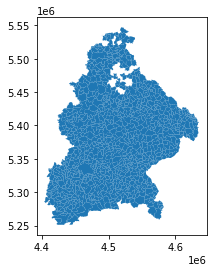

In [120]:
gdf.plot()

In [16]:
sdf = pd.DataFrame.spatial.from_geodataframe(gdf)
sdf.head()

,land,modellart,objart,objart_txt,objid,hdu_x,beginn,ende,adm,avg,bez_gem,bez_krs,bez_lan,bez_rbz,sch,SHAPE
0,BY,Basis-DLM#DTK25,75003,AX_KommunalesGebiet,DEBYBDLMjK0001Ia,0,2016-10-24T10:51:51Z,None,6003,None,Ingolstadt,Ingolstadt,Freistaat Bayern,Oberbayern,09161000,"{""rings"": [[[4459621.95, 5406999.14899953], [4..."
1,BY,Basis-DLM#DTK25,75003,AX_KommunalesGebiet,DEBYBDLMjK0001Ib,0,2016-08-05T20:31:26Z,None,6003,None,München,München,Freistaat Bayern,Oberbayern,09162000,"{""rings"": [[[4460151.75, 5330875.56999951], [4..."
2,BY,Basis-DLM#DTK25,75003,AX_KommunalesGebiet,DEBYBDLMjK0001Ic,0,2016-07-20T20:33:04Z,None,6003,None,Rosenheim,Rosenheim,Freistaat Bayern,Oberbayern,09163000,"{""rings"": [[[4507854.93, 5305163.8199995], [45..."
3,BY,Basis-DLM#DTK25,75003,AX_KommunalesGebiet,DEBYBDLMjK0001Id,0,2016-08-18T20:31:00Z,None,6003,None,Altötting,Altötting,Freistaat Bayern,Oberbayern,09171111,"{""rings"": [[[4548298.38, 5340451.12999951], [4..."
4,BY,Basis-DLM#DTK25,75003,AX_KommunalesGebiet,DEBYBDLMjK0001Ie,0,2016-10-24T10:51:51Z,None,6003,None,Burghausen,Altötting,Freistaat Bayern,Oberbayern,09171112,"{""rings"": [[[4556650.6, 5332422.49999951], [45..."


In [17]:
sdf.spatial.to_featureclass(location=r"C:\Users\Servi\Documents\JOIN_PYTHON\New File Geodatabase.gdb\ft")

'C:\\Users\\Servi\\Documents\\JOIN_PYTHON\\New File Geodatabase.gdb\\ft'

In [138]:
new=pd.DataFrame.spatial.from_featureclass(location=r"C:\Users\Servi\Documents\JOIN_PYTHON\test3.gdb\hola")

In [151]:
new

,shape_length,shape_area,SHAPE
0,1.273663e+06,7.598277e+10,"{""rings"": [[[-8419576.605407715, 546349.835693..."
1,9.495109e+05,4.553206e+10,"{""rings"": [[[-8510031.876220703, 647659.738891..."


In [159]:
new2.spatial.to_featureclass(location=r"C:\Users\Servi\Documents\JOIN_PYTHON\test3.gdb\gdb")

'C:\\Users\\Servi\\Documents\\JOIN_PYTHON\\test3.gdb\\gdb.shp'

In [145]:
def convert_dtypes_arcgis(df):
  # Convert dataframe dtypes which are not compatible with ArcGIS
  # Use builtin Pandas dtype conversion
      df = df.convert_dtypes(infer_objects=True)
  # Then str convert any remaining special object/category fields 
      for col in df.columns:
    # print(col, '/', df[col].dtype)
        if df[col].dtype == 'object' or df[col].dtype == 'category':
              df[col] = df[col].astype('str')
  # Return modified df
      return df

In [150]:
new2=convert_dtypes_arcgis(new)
new2

,shape_length,shape_area,SHAPE
0,1273663.356268,75982773601.497238,"{""rings"": [[[-8419576.605407715, 546349.835693..."
1,949510.9493,45532061796.94545,"{""rings"": [[[-8510031.876220703, 647659.738891..."


In [13]:
wfs11.get_schema('bvv:vg_ex')

{'properties': {'land': 'string',
  'modellart': 'string',
  'objart': 'string',
  'objart_txt': 'string',
  'objid': 'string',
  'hdu_x': 'short',
  'beginn': 'string',
  'ende': 'string',
  'adm': 'string',
  'avg': 'string',
  'bez_gem': 'string',
  'bez_krs': 'string',
  'bez_lan': 'string',
  'bez_rbz': 'string',
  'sch': 'string'},
 'required': [],
 'geometry': '3D MultiPolygon',
 'geometry_column': 'geom'}

In [37]:
from osgeo import ogr
import fiona 

In [25]:
driver = ogr.GetDriverByName("FileGDB")

In [26]:
ds = driver.open(r"C:\Users\Servi\Documents\JOIN_PYTHON\New File Geodatabase.gdb", 0)

AttributeError: 'NoneType' object has no attribute 'open'

In [27]:
layers = fiona.listlayers(r"C:\Users\Servi\Documents\JOIN_PYTHON\New File Geodatabase.gdb")

In [28]:
layers[0]

'test'

In [29]:
for layer in layers:
    gdf = gpd.read_file(r"C:\Users\Servi\Documents\JOIN_PYTHON\New File Geodatabase.gdb",layer=layer)
    # Do stuff with the gdf

In [5]:
import fiona

y=fiona.open(r"C:\Users\Servi\Documents\JOIN_PYTHON\New File Geodatabase.gdb", driver='FileGDBgggggggggggggg') 
y

<open Collection 'C:\Users\Servi\Documents\JOIN_PYTHON\New File Geodatabase.gdb:test', mode 'r' at 0x2d9824d1978>

In [16]:
json=gpd.read_file(r"C:\Users\Servi\Downloads\final_barrio_13.geojson",driver="GeoJson")

In [6]:
json.to_file("dribe.gdb",driver="FileGDB")

NameError: name 'json' is not defined

In [12]:
import ogr
cnt = ogr.GetDriverCount()
formatsList = []  # Empty List

for i in range(cnt):
    driver = ogr.GetDriver(i)
    driverName = driver.GetName()
    if not driverName in formatsList:
        formatsList.append(driverName)

formatsList.sort() # Sorting the messy list of ogr drivers

for i in formatsList:
    print (i)

ARCGEN
AVCBin
AVCE00
AeronavFAA
AmigoCloud
BNA
CAD
CSV
CSW
Carto
Cloudant
CouchDB
DB2ODBC
DGN
DXF
EDIGEO
EEDA
ESRI Shapefile
ESRIJSON
ElasticSearch
FileGDB
GFT
GML
GPKG
GPSBabel
GPSTrackMaker
GPX
GeoJSON
GeoJSONSeq
GeoRSS
Geoconcept
Geomedia
HTF
HTTP
Idrisi
JML
JP2OpenJPEG
JPEG2000
KML
LIBKML
MBTiles
MSSQLSpatial
MVT
MapInfo File
Memory
NGW
ODBC
ODS
OGR_GMT
OGR_PDS
OGR_SDTS
OGR_VRT
OSM
OpenAir
OpenFileGDB
PCIDSK
PDF
PDS4
PGDUMP
PGeo
PLSCENES
PostgreSQL
REC
S57
SEGUKOOA
SEGY
SQLite
SUA
SVG
SXF
Selafin
TIGER
TopoJSON
UK .NTF
VDV
VFK
WAsP
WFS
WFS3
Walk
XLS
XLSX
XPlane
netCDF


In [3]:
import fiona
fiona.supported_drivers

{'AeronavFAA': 'r',
 'ARCGEN': 'r',
 'BNA': 'raw',
 'DXF': 'raw',
 'CSV': 'raw',
 'OpenFileGDB': 'r',
 'ESRI Shapefile': 'raw',
 'GeoJSON': 'rw',
 'GPKG': 'rw',
 'GML': 'raw',
 'GPX': 'raw',
 'GPSTrackMaker': 'raw',
 'Idrisi': 'r',
 'MapInfo File': 'raw',
 'DGN': 'raw',
 'PCIDSK': 'r',
 'S57': 'r',
 'SEGY': 'r',
 'SUA': 'r'}

In [31]:
gdf.to_file("result.gdb",driver="FileGDB") 

ValueError: Cannot write empty DataFrame to file.

In [39]:
ogrinfo --formats

NameError: name 'ogrinfo' is not defined

In [1]:
from osgeo import ogr

#open an input datasource
indriver=ogr.GetDriverByName('FileGDB')

In [4]:
source = indriver.CreateDataSource(r"C:\Users\Servi\Documents\JOIN_PYTHON\testtst.gdb")

In [ ]:
srcdb = indriver.Open(r"C:\Users\Servi\Documents\JOIN_PYTHON\test8.gdb")

In [ ]:
outdriver=ogr.GetDriverByName('FileGDB')
source=outdriver.Open(r"C:\Users\Servi\Documents\JOIN_PYTHON\test4.gdb",1)

In [1]:
source

NameError: name 'source' is not defined

In [ ]:
outLayer = source.CreateLayer("testcapa", geom_type=ogr.wkbPolygon)

In [7]:
import fiona
with fiona.drivers():
    with fiona.open(path=r"C:\Users\Servi\Documents\JOIN_PYTHON\New File Geodatabase.gdb", driver='OpenFileGDB') as source:
        print(source.meta)

C:\Users\Servi\AppData\Local\ESRI\conda\envs\ArcPro\lib\site-packages\ipykernel_launcher.py:2: FionaDeprecationWarning: Use fiona.Env() instead.
  


TypeError: open() missing 1 required positional argument: 'fp'

In [6]:
import fiona
with fiona.drivers():
     with fiona.open(path=r"C:\Users\Servi\Documents\JOIN_PYTHON\New File Geodatabase.gdb", driver='FileGDB') as source:
        print(source.meta)

C:\Users\Servi\AppData\Local\ESRI\conda\envs\ArcPro\lib\site-packages\ipykernel_launcher.py:2: FionaDeprecationWarning: Use fiona.Env() instead.
  


TypeError: open() missing 1 required positional argument: 'fp'

In [4]:
fiona.open(path=r"C:\Users\Servi\Documents\JOIN_PYTHON\New File Geodatabase.gdb", driver='FileGDB',0)

SyntaxError: positional argument follows keyword argument (<ipython-input-4-5deb75a1332a>, line 1)

In [2]:
from osgeo import ogr
driver=ogr.GetDriverByName("FileGDB")
print(driver.GetName())

FileGDB


In [10]:
print(driver.GetName())

AttributeError: 'NoneType' object has no attribute 'GetName'

In [3]:
import fiona
with fiona.drivers():
     with fiona.open(path=r"C:\Users\Servi\Documents\JOIN_PYTHON\New File Geodatabase.gdb", "r") as source:
        print(source.meta)

SyntaxError: positional argument follows keyword argument (<ipython-input-3-c46a66290173>, line 3)

In [12]:
import osgeo
import fiona

In [8]:
from osgeo import ogr
driver = ogr.GetDriverByName("FileGDB")
print(driver.GetName())

FileGDB


In [2]:
import fiona
with fiona.drivers():
     with fiona.open(path=r"C:\Users\Servi\Documents\JOIN_PYTHON\upz1.shp", 'r') as source:
        print(source.meta)

SyntaxError: positional argument follows keyword argument (<ipython-input-2-aee4198978f5>, line 3)